In [1]:
!git clone https://github.com/Atharva-Malode/ML-Bootcamp.git

fatal: destination path 'ML-Bootcamp' already exists and is not an empty directory.


In [2]:
!pip install pandas numpy seaborn matplotlib pycaret

In [3]:
#IMPORTING ALL NECESSARY LIBRARIES & PACKAGES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from pycaret.classification import *

In [4]:
df = pd.read_csv("/content/ML-Bootcamp/Week-4/Day-1/Dataset/dataset_full.csv")
df

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,...,1,3,1,3597,0,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,...,1,2,2,591,0,2,0,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,...,1,2,5,14391,1,0,0,0,0,1
88645,2,0,0,1,0,0,0,0,0,0,...,1,1,1,52,1,0,0,0,0,1


In [5]:
# summary statics of the dataset
print(df.describe())

        qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
count  88647.000000    88647.000000       88647.000000   88647.000000   
mean       2.191343        0.328810           0.113879       1.281781   
std        1.235636        1.119286           0.657767       1.893929   
min        1.000000        0.000000           0.000000       0.000000   
25%        2.000000        0.000000           0.000000       0.000000   
50%        2.000000        0.000000           0.000000       0.000000   
75%        2.000000        0.000000           0.000000       2.000000   
max       24.000000       35.000000          21.000000      44.000000   

       qty_questionmark_url  qty_equal_url    qty_at_url   qty_and_url  \
count          88647.000000   88647.000000  88647.000000  88647.000000   
mean               0.009329       0.205861      0.022133      0.140885   
std                0.112568       0.954272      0.279652      0.924864   
min                0.000000       0.000000    

In [6]:
df.isnull().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

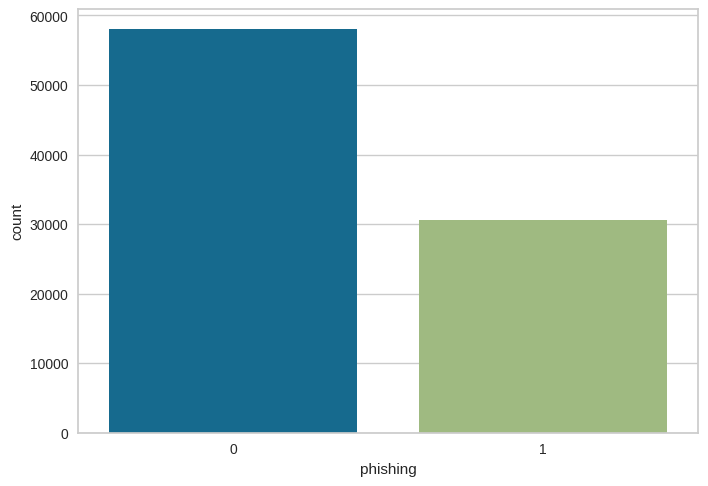

In [7]:
# visualizing the given dataset

sns.countplot(x='phishing', data=df)
plt.show()

In [8]:
cols_to_drop = ['url_google_index',
                'qty_vowels_domain',
                'domain_google_index',
                'server_client_domain',
                'tld_present_params',
                'time_response',
                'domain_spf',
                'qty_ip_resolved',
                'qty_nameservers',
                'qty_mx_servers',
                'url_shortened']

df = df.drop(cols_to_drop, axis = 1)

In [9]:
rows, columns = df.shape
print(f"Number of rows : {rows}")
print(f"Number of columns : {columns}")

Number of rows : 88647
Number of columns : 101


## Performing feature engineering

In [10]:
original_features = list(df.columns)

In [11]:
original_features

['qty_dot_url',
 'qty_hyphen_url',
 'qty_underline_url',
 'qty_slash_url',
 'qty_questionmark_url',
 'qty_equal_url',
 'qty_at_url',
 'qty_and_url',
 'qty_exclamation_url',
 'qty_space_url',
 'qty_tilde_url',
 'qty_comma_url',
 'qty_plus_url',
 'qty_asterisk_url',
 'qty_hashtag_url',
 'qty_dollar_url',
 'qty_percent_url',
 'qty_tld_url',
 'length_url',
 'qty_dot_domain',
 'qty_hyphen_domain',
 'qty_underline_domain',
 'qty_slash_domain',
 'qty_questionmark_domain',
 'qty_equal_domain',
 'qty_at_domain',
 'qty_and_domain',
 'qty_exclamation_domain',
 'qty_space_domain',
 'qty_tilde_domain',
 'qty_comma_domain',
 'qty_plus_domain',
 'qty_asterisk_domain',
 'qty_hashtag_domain',
 'qty_dollar_domain',
 'qty_percent_domain',
 'domain_length',
 'domain_in_ip',
 'qty_dot_directory',
 'qty_hyphen_directory',
 'qty_underline_directory',
 'qty_slash_directory',
 'qty_questionmark_directory',
 'qty_equal_directory',
 'qty_at_directory',
 'qty_and_directory',
 'qty_exclamation_directory',
 'qty_sp

In [12]:
dataset_array = np.array(df)

In [13]:
print(dataset_array)

[[3 0 0 ... 0 0 1]
 [5 0 1 ... 1 0 1]
 [2 0 0 ... 1 0 0]
 ...
 [2 1 0 ... 1 0 1]
 [2 0 0 ... 1 0 1]
 [2 0 0 ... 0 0 0]]


In [14]:
feature_indices  = []
attributes = ['url','domain','file','params']

In [15]:
new_dataset = {}

In [16]:
for index,name in enumerate(original_features):
    if 'qty' in name and name.split('_')[-1] in attributes:
        feature_indices.append([index, name.split("_")[-1]])
    else:
        new_dataset[name] = dataset_array[:, index]

In [17]:
for index, attribute in feature_indices:
    if attribute == 'domain':
        if f'qty_char_{attribute}' not in new_dataset.keys():
            new_dataset[f'qty_char_{attribute}'] = np.zeros(rows)

        new_dataset[f'qty_char_{attribute}'] += dataset_array[:, index]


In [18]:
df1 = pd.DataFrame(new_dataset).astype(int)

In [20]:
df1[df1<-1] = -1
df1

,length_url,domain_length,domain_in_ip,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,...,params_length,email_in_url,asn_ip,time_domain_activation,time_domain_expiration,ttl_hostname,tls_ssl_certificate,qty_redirects,phishing,qty_char_domain
0,25,17,0,1,0,0,1,0,0,0,...,-1,0,60781,-1,-1,892,0,0,1,2
1,223,16,0,3,0,0,3,0,0,0,...,165,0,36024,579,150,9540,1,0,1,2
2,15,14,0,0,0,0,1,0,0,0,...,-1,0,4766,-1,-1,589,1,0,0,2
3,81,19,0,2,0,2,5,0,0,0,...,-1,0,20454,-1,-1,292,1,0,1,2
4,19,19,0,-1,-1,-1,-1,-1,-1,-1,...,-1,0,53831,6998,306,3597,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,23,23,0,-1,-1,-1,-1,-1,-1,-1,...,-1,0,8560,5509,334,3597,0,0,0,4
88643,34,34,0,-1,-1,-1,-1,-1,-1,-1,...,-1,0,26496,5046,431,591,0,2,0,2
88644,70,22,0,1,1,0,5,0,0,0,...,-1,0,394695,1844,712,14391,1,0,1,1
88645,28,27,0,0,0,0,1,0,0,0,...,-1,0,47583,-1,-1,52,1,0,1,2


In [21]:
# summary statistics of dataset
print(df1.describe())

         length_url  domain_length  domain_in_ip  qty_dot_directory  \
count  88647.000000   88647.000000  88647.000000       88647.000000   
mean      36.347615      18.560820      0.002267          -0.323666   
std       46.191590       6.598694      0.047564           0.899499   
min        4.000000       4.000000      0.000000          -1.000000   
25%       17.000000      14.000000      0.000000          -1.000000   
50%       22.000000      18.000000      0.000000          -1.000000   
75%       38.000000      22.000000      0.000000           0.000000   
max     4165.000000     231.000000      1.000000          19.000000   

       qty_hyphen_directory  qty_underline_directory  qty_slash_directory  \
count          88647.000000             88647.000000         88647.000000   
mean              -0.360813                -0.477997             0.713685   
std                1.101398                 0.682409             2.216137   
min               -1.000000                -1.000000

In [22]:
# setting up the data for modelling

setup(data=df1, target='phishing')

,Description,Value
0,Session id,7194
1,Target,phishing
2,Target type,Binary
3,Original data shape,"(88647, 32)"
4,Transformed data shape,"(88647, 32)"
5,Transformed train set shape,"(62052, 32)"
6,Transformed test set shape,"(26595, 32)"
7,Numeric features,31
8,Preprocess,True
9,Imputation type,simple


In [23]:
# compare and select the best data model

best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9664,0.9941,0.9524,0.9507,0.9515,0.9259,0.9259,6.3690
rf,Random Forest Classifier,0.9663,0.9936,0.9566,0.9466,0.9515,0.9257,0.9258,4.2920
et,Extra Trees Classifier,0.9654,0.9924,0.9546,0.9458,0.9501,0.9236,0.9236,3.4050
lightgbm,Light Gradient Boosting Machine,0.9618,0.9931,0.9472,0.9426,0.9449,0.9156,0.9157,0.9020
dt,Decision Tree Classifier,0.9492,0.9437,0.9247,0.9281,0.9264,0.8876,0.8876,0.3300
gbc,Gradient Boosting Classifier,0.9478,0.9881,0.9298,0.9202,0.9249,0.8850,0.8850,7.4960
ada,Ada Boost Classifier,0.9313,0.9823,0.8956,0.9049,0.9002,0.8479,0.8479,1.9250
lr,Logistic Regression,0.9129,0.9667,0.9154,0.8456,0.8791,0.8112,0.8128,3.1960
ridge,Ridge Classifier,0.9037,0.0000,0.9521,0.8050,0.8724,0.7959,0.8031,0.0950
lda,Linear Discriminant Analysis,0.9028,0.9710,0.9528,0.8029,0.8715,0.7942,0.8018,0.2660


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [25]:
tune_model = tune_model(best_model, n_iter=1, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9083,0.9921,0.9921,0.7941,0.8821,0.8086,0.8220
1,0.9017,0.9909,0.9925,0.7819,0.8747,0.7957,0.8111
2,0.9109,0.9921,0.9939,0.7980,0.8852,0.8138,0.8269
3,0.9101,0.9924,0.9925,0.7971,0.8841,0.8121,0.8251
4,0.9107,0.9914,0.9925,0.7983,0.8849,0.8133,0.8262
5,0.9039,0.9913,0.9944,0.7851,0.8774,0.8002,0.8154
6,0.9085,0.9925,0.9939,0.7934,0.8825,0.8090,0.8228
7,0.9060,0.9920,0.9958,0.7882,0.8799,0.8045,0.8193
8,0.9093,0.9913,0.9949,0.7945,0.8835,0.8107,0.8244


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 1 candidates, totalling 10 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [26]:
predictions = predict_model(tune_model, data=df1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9764,0.9966,0.9666,0.9652,0.9659,0.9479,0.9479
